### Práctica: Análisis de Sistemas en el Dominio del Tiempo vs. Dominio 's'.

**Objetivo:** Analizar un sistema LTI simple en ambos dominios para verificar que la respuesta es la misma. Se comparará el resultado obtenido a través del concepto de convolución en el tiempo con el método de la función de transferencia en el dominio de Laplace (dominio 's').

**Relaciones Fundamentales:**
* **Dominio del Tiempo:** La salida $y(t)$ es la convolución de la entrada $r(t)$ con la respuesta al impulso $h(t)$.
    $$ y(t) = r(t) * g(t) $$
* **Dominio 's' (Laplace):** La transformada de la salida $Y(s)$ es el producto de la transformada de la entrada $R(s)$ y la función de transferencia $G(s)$.
    $$ Y(s) = R(s) \cdot G(s) $$
    

# Paso 1: Importar las bibliotecas necesarias.

# NumPy: Para operaciones numéricas y manejo de arreglos.
# Matplotlib: Para la visualización y graficación de resultados.
# Python Control Library: Para la creación de sistemas de control y su simulación.
import numpy as np
import matplotlib.pyplot as plt
import control as ct


# Configuración para que las gráficas se vean mejor en el notebook.

# Paso 2: Definir el sistema y la entrada

# --- Dominio del Tiempo ---
# Vamos a analizar un sistema de primer orden, como un circuito RC.
# Su respuesta al impulso, g(t), es una exponencial decreciente.
# g(t) = 5 * exp(-2t)

# La entrada, r(t), será una función escalón unitario (valor 1 para t >= 0).
# r(t) = u(t)

# --- Dominio 's' (Laplace) ---
# La Transformada de Laplace de g(t) es la Función de Transferencia G(s).
# G(s) = L{5 * exp(-2t)} = 5 / (s + 2)
# El numerador es [5] y el denominador es [1*s + 2].

# Paso 3: Simular y Calcular la Salida

# La forma más directa de comparar ambos mundos es simular la respuesta del sistema
# a una entrada escalón. La función `step_response` hace precisamente esto:
# Resuelve la ecuación en el tiempo, lo que es equivalente a la convolución,
# utilizando el modelo del sistema en el dominio 's' (la función de transferencia).

# Definimos el vector de tiempo para la simulación

# Calculamos la respuesta al escalón para el sistema G(s)
# La función devuelve el tiempo (t) y la salida c(t)
tiempo, c_dominio_tiempo = ct.step_response(G_s, T=t)

# --- Solución Analítica para Comparación ---
# Para verificar, podemos resolver la convolución de forma analítica.
# La convolución de r(t) = u(t) y g(t) = 5*exp(-2t) es:
# c(t) = 2.5 * (1 - exp(-2t))
# Calculamos esta solución para compararla con la simulación.

# Paso 4: Graficar y Comparar los Resultados


# Graficar la salida obtenida por la simulación de la biblioteca de control

# Graficar la señal de entrada r(t) para tener una referencia

# Títulos y etiquetas

### Conclusión de la Práctica

Como se puede observar en la gráfica, la línea azul (Salida Simulada) y la línea roja punteada (Salida Analítica) **se superponen perfectamente**.

Esto demuestra que:

1.  El método de la **Función de Transferencia** en el dominio 's' es una herramienta precisa para analizar el comportamiento de un sistema.
2.  La simulación realizada por la biblioteca de control, que usa el modelo $H(s)$, produce el mismo resultado que resolver la **integral de convolución** en el dominio del tiempo.
3.  Se confirma que la Transformada de Laplace es un puente eficaz que simplifica el análisis de sistemas, convirtiendo la convolución en una simple multiplicación algebraica.

La Función de Transferencia del sistema es:
<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    5
  -----
  s + 2


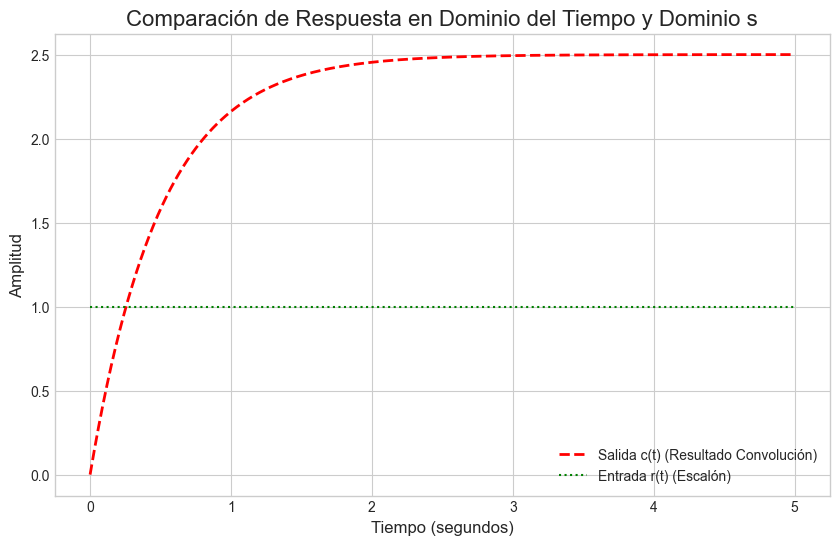

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

plt.style.use('seaborn-v0_8-whitegrid')

numerador = [5]
denominador = [1, 2]
G_s = ct.tf(numerador, denominador)

print("La Función de Transferencia del sistema es:")
print(G_s)

t = np.linspace(0, 5, 500) # Simular de 0 a 5 segundos

tiempo, c_dominio_tiempo = ct.step_response(G_s, T=t)

c_dominio_s=2.5*(1-np.exp(-2 * tiempo))

plt.figure(figsize=(10, 6))

plt.plot(tiempo, c_dominio_s, label='Salida c(t) (Resultado Convolución)', linestyle='--', color='red', linewidth=2)

plt.plot(tiempo, np.ones_like(tiempo), label='Entrada r(t) (Escalón)', linestyle=':', color='green')

plt.title('Comparación de Respuesta en Dominio del Tiempo y Dominio s', fontsize=16)
plt.xlabel('Tiempo (segundos)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


### Ejercicio Propuesto. Circuito RL (Primer Orden)

**Instrucciones:**
Aplica el mismo procedimiento de la práctica anterior para analizar los siguientes dos sistemas. Para cada uno, debes:
1.  A partir de su ecuación diferencial, obtener la **Función de Transferencia** $G(s) = Y(s)/R(s)$.
2.  Calcular de forma **analítica** la respuesta al escalón unitario $c(t)$.
3.  **Simular** la respuesta al escalón en Python usando la función de transferencia y la biblioteca `control`.
4.  **Graficar** en una misma figura la respuesta simulada y la respuesta analítica para comprobar que son idénticas.


Un circuito RL se describe por la siguiente ecuación diferencial, donde la entrada $r(t)$ es el voltaje $V(t)$ y la salida $c(t)$ es la corriente $I(t)$.

$$ L \frac{dc(t)}{dt} + R c(t) = r(t) $$

**Valores de los componentes:**
* Resistencia $R = 4 \, \Omega$
* Inductancia $L = 2 \, H$
* Entrada $r(t)$: Un escalón de **1 Volt** aplicado en $t=0$.